In [63]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import axes3d, Axes3D

Text(0, 0.5, 'profit in $10,000s')

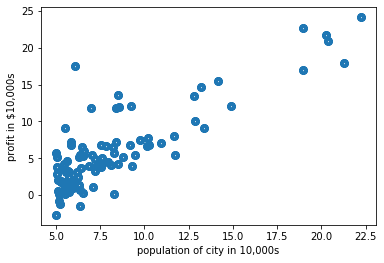

In [64]:
#print('plotting data')
#data = np.loadtxt(os.path.join('Data', 'ex1data1.txt'), delimiter=',')
data = np.loadtxt('ex1data1.txt',delimiter=',')
X = data[:,0]
Y = data[:,1]
m = Y.size
plt.scatter(X,Y,1,lw=8,marker='*')
plt.xlabel("population of city in 10,000s")
plt.ylabel("profit in $10,000s")

In [65]:
#def h(theta,X): #Linear hypothesis function
 #   return np.dot(X,theta)
def compute_cost(X, y, theta):
    m = y.size 
    J = 0
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

X1 = np.stack([np.ones(m),X], axis=1) #add one column of 1 to X
#print(X1)
#theta = np.zeros(2) #initialize fitting parameters
iterations = 1500
alpha = 0.01

#J = computeCost(X, Y, theta=np.array([0.0, 0.0]))

J = compute_cost(X1, Y, theta=np.array([0.0, 0.0]))
print(J)
print("Expected J value: 32.07")

32.072733877455676
Expected J value: 32.07


In [66]:
# gradient descent
X=X1
def gradient_descent(X, y, theta, alpha, num_iters):
    # Initialize some useful values
    m = y.size
    J_history = np.zeros(num_iters)

    for i in range(0, num_iters):
        m = y.shape[0]
        theta_copy = theta.copy()
        J_history=[]
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(compute_cost(X1,y,theta))

    return theta, J_history
theta = np.zeros(2)
theta, J_history = gradient_descent(X,Y, theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))
print('Expected theta values (approximately): [-3.6303, 1.1664]')

Theta found by gradient descent: -3.6303, 1.1664
Expected theta values (approximately): [-3.6303, 1.1664]


For population size as 35,000, a predicted profit of 4519.77

For population size as 70,000, a predicted profit of 45342.45



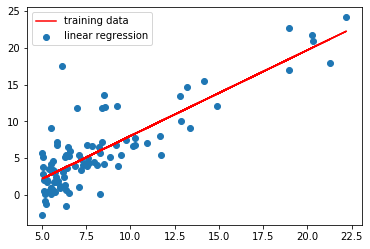

In [67]:
plt.scatter(X[:,1],Y)
plt.plot(X[:,1],np.dot(X,theta),'-',color='r')
plt.legend(['training data','linear regression'])

predict1 = np.dot([1, 3.5], theta)
print('For population size as 35,000, a predicted profit of {:.2f}\n'.format(predict1*10000))

predict2 = np.dot([1, 7], theta)
print('For population size as 70,000, a predicted profit of {:.2f}\n'.format(predict2*10000))

In [68]:
data1= np.loadtxt('ex1data2.txt',delimiter=',')
data=data1.copy()
X = data[:,:2]
Y = data[:,2]
m=Y.size
def feature_normalize(X):
    # You need to set these values correctly
    n = X.shape[1]  # the number of features
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X,axis=0)
    sigma=np.std(X,axis=0)
    X_norm=(X-mu)/sigma


    return X_norm, mu, sigma

X_norm,mu,sigma=feature_normalize(X)
print("the mean is :"+str(mu))
print("the std is :"+str(sigma))


the mean is :[2000.68085106    3.17021277]
the std is :[7.86202619e+02 7.52842809e-01]


In [69]:
#print(X_norm.shape[1])
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [70]:
# for gradient descent
def compute_costmulti(X,y,theta):
    m = y.shape[0] # number of training examples
    J = 0
    h = np.dot(X, theta)
    
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

def gradient_descentmulti(X, y, theta, alpha, num_iters):
    # Initialize some useful values
    m = y.shape[0]
    theta_copy = theta.copy()
    J_history=[]
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(compute_costmulti(X,y,theta))

    return theta, J_history
theta = np.zeros(3)
theta, J_history = gradient_descentmulti(X,Y, theta, alpha, iterations)
print('Theta found by gradient descent: {:s}'.format(str(theta)))

X_array = [1, 1650, 3]
X_array[1:3] = (X_array[1:3] - mu) / sigma
price = np.dot(X_array, theta)   # You should change this

print('Predicted price for a 1650 sq-ft, 3 br house: ${:.0f}'.format(price))

Theta found by gradient descent: [340412.56301439 109370.05670466  -6500.61509507]
Predicted price for a 1650 sq-ft, 3 br house: $293098


In [71]:
data2 = np.loadtxt('ex1data2.txt',delimiter=',')
data=data2.copy()
X=data[:,:2]
Y=data[:,2]
m = Y.size
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [72]:
# normal equation
def normaleqn(X,y):
    #theta = np.zeros(X.shape[1])
    return np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,y))
    #return theta

theta=normaleqn(X,Y)
print(theta)
X = [1,1650,3]
#X[1:3]=(X[1:3]-mu)/sigma
price=np.dot(X,theta)
print(price)

[89597.9095428    139.21067402 -8738.01911233]
293081.4643348931
